In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/chembl_29.db')

In [ ]:
data = pd.read_sql_query()

In [68]:
from rdkit import Chem
# To add a new cell, type '# %%'
# To add a new markdown cell, type '# %% [markdown]'
# %%
import pandas as pd
import sqlite3
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
from matplotlib import pyplot as ptl
import seaborn as sns
import sys, os
from rdkit import Chem
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors
from rdkit.Chem.QED import properties

import subprocess
import threading
import queue
import os
sys.path.append("../module/")
from lipinski import *

In [2]:
smiles = 'Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1'

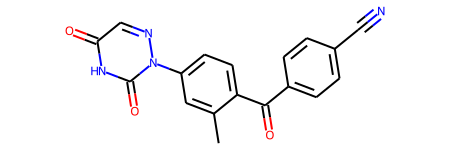

In [3]:
Chem.MolFromSmiles(smiles)

In [67]:
size = 0
for k in range(14):
    con = sqlite3.connect(f"../data/dados_att/dados_atualizados_{k}.db")
    dataframe = pd.read_sql('select * from dados', con)
    size += len(dataframe)
size

24150

In [59]:
con = sqlite3.connect('../data/dados_att/dados_atualizados_14.db')
con2 = sqlite3.connect('../data/dados_att/dados_atualizados_1.db')

In [60]:
dataframe = pd.read_sql('select * from dados', con)
#dataframe = pd.read_csv('inibidores_encontrados.csv')

In [61]:
dat = pd.read_sql('select * from dados', con2)

In [62]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,cx_most_apka,cx_most_bpka,cx_logp,cx_logd,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles


In [ ]:
dat

In [18]:
b = dataframe.copy()

In [24]:
id(dataframe.chembl_id) == id(b.chembl_id)

False

In [10]:
b.loc[b.chembl_id == "CHEMBL31000"]

,Unnamed: 0,molregno,chembl_id,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,grupos,grupos_cluster_knn
0,7,43896,CHEMBL31000,222.68,2.29,3.0,2.0,45.15,3.0,NaN,...,0.84,222.056,C11H11ClN2O,3.0,2.0,0,0,1,0,0


In [6]:
dataframe = dataframe.drop(['cx_most_apka', 'cx_most_bpka', 'molecular_species', 'cx_logp', 'cx_logd', 'heavy_atoms', 'qed_weighted'], axis=1)

In [7]:
dataframe.loc[dataframe.isnull().any(axis=1)].sort_values(by='psa')

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
121,CHEMBL383864,1081.39,NaN,NaN,NaN,1081.39,NaN,1080.6498,NaN,NaN,NaN,COCCc1ccc(OCC(O)CN(CC(O)COc2ccc(CCOC)cc2)C(C)C...
212,CHEMBL266306,1574.97,NaN,NaN,NaN,1574.97,NaN,1573.7792,NaN,NaN,NaN,CC(C)[C@H](NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@H](...
213,CHEMBL385851,1070.15,NaN,NaN,NaN,1070.15,NaN,1069.4611,NaN,NaN,NaN,CC(C)[C@@H]1NC(=O)CNC(=O)[C@H](CO)NC(=O)[C@@H]...
346,CHEMBL439178,1958.13,NaN,NaN,NaN,1958.13,NaN,1956.8775,NaN,NaN,NaN,CCCN(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H]...
352,CHEMBL414772,1916.10,NaN,NaN,NaN,1916.10,NaN,1914.8669,NaN,NaN,NaN,CCCN(NC(=O)[C@H]1CCCN1C(=O)[C@@H](NC(=O)[C@@H]...
...,...,...,...,...,...,...,...,...,...,...,...,...
9881,CHEMBL439090,2453.90,NaN,NaN,NaN,2453.90,NaN,2452.0030,NaN,NaN,NaN,CC[C@@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@...
9882,CHEMBL411371,2530.00,NaN,NaN,NaN,2530.00,NaN,2528.0343,NaN,NaN,NaN,CC[C@@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@...
9889,CHEMBL382683,2481.95,NaN,NaN,NaN,2481.95,NaN,2480.0343,NaN,NaN,NaN,CCC[C@@H](NC(=O)[C@@H](NC(=O)[C@H](CC(=O)O)NC(...
9890,CHEMBL440254,2515.97,NaN,NaN,NaN,2515.97,NaN,2514.0187,NaN,NaN,NaN,CC[C@@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@...


In [8]:
ids_com_nan = dataframe.loc[dataframe.isnull().any(axis=1)][['chembl_id', 'canonical_smiles']]

In [24]:
dataframe.query('chembl_id == 'CHEMBL266306'')

SyntaxError: invalid syntax (3203176398.py, line 1)

In [28]:
dataframe= dataframe.drop(dataframe.iloc[:,0:1], axis=1)

In [43]:
dataframe[dataframe[dataframe.columns[0]] == "exist"]

,molregno,chembl_id,mw_freebase,alogp,hba,hbd,psa,rtb,cx_most_apka,cx_most_bpka,...,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,molecular_species_ACID,molecular_species_BASE,molecular_species_NEUTRAL,grupos,grupos_cluster_knn


In [30]:
teste = dataframe.columns

In [39]:
teste[0]

'molregno'

In [11]:
quantidades = 1 
threads_num = 20
for i in range(quantidades):
    print(f"Parte {i + 1} de {quantidades}")
    tamanho_ini = int(i * len(ids_com_nan)/quantidades)
    tamanho_fim = int((i + 1) * len(ids_com_nan)/quantidades)
    atualiza_data_frame_com_lipinski(ids_com_nan, dataframe, threads_num)


Parte 1 de 1


In [2]:
df.loc[df.isnull().any(axis=1)].sort_values(by='chembl_id')

NameError: name 'df' is not defined

In [13]:
dataframe

,chembl_id,mw_freebase,alogp,psa,rtb,full_mwt,aromatic_rings,mw_monoisotopic,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations,canonical_smiles
0,CHEMBL6329,341.75,2.11,84.82,3.0,341.75,3.0,341.0567,6.0,1.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl
1,CHEMBL6328,332.32,1.33,108.61,3.0,332.32,3.0,332.0909,7.0,1.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1
2,CHEMBL265667,357.80,2.27,87.98,3.0,357.80,3.0,357.0880,6.0,2.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1
3,CHEMBL6362,307.31,1.46,84.82,3.0,307.31,3.0,307.0957,6.0,1.0,0.0,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1
4,CHEMBL267864,341.75,2.11,84.82,3.0,341.75,3.0,341.0567,6.0,1.0,0.0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,CHEMBL430323,548.49,6.65,96.61,6.0,548.49,3.0,547.0987,6.0,2.0,2.0,O=c1c2c(oc(O)c1C(c1cccc(NS(=O)(=O)c3ccc(Cl)c(C...
9996,CHEMBL16377,360.37,4.19,91.56,3.0,360.37,4.0,360.1110,6.0,3.0,0.0,CC(=O)c1c(O)n(O)c2cc(NC(=O)c3ccc4ccccc4c3)ccc12
9997,CHEMBL16561,292.32,2.23,88.52,4.0,353.40,2.0,292.0518,6.0,2.0,0.0,CCOc1ccc(-c2csc(NC(=O)C(=O)O)n2)cc1.NCCO
9998,CHEMBL16562,320.37,2.71,77.52,5.0,320.37,2.0,320.0831,6.0,1.0,0.0,CCOC(=O)C(=O)Nc1nc(-c2ccc(OCC)cc2)cs1


In [14]:
con_2 = sqlite3.connect('data_teste.db')

In [15]:
#leitura.to_sql("data",con_2,if_exists='replace')

In [16]:
#leitura